In [25]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt as eks
import ImageView as imv

Tree_00032   = '..\hdr-bilder\Tree\Tree_00032.png'
Balls_00032  = '..\hdr-bilder\Balls\Balls_00032.png'
StillLife_01024 = '..\hdr-bilder\StillLife\StillLife_01024.png'


def glattingBW(fil):
    image = orig_image = imageio.imread(fil)                        #Originalbilde uten anvendelser
    image = orig_image.astype(float)/255          
    gray_image = np.sum(orig_image.astype(float),2)/(3*255)
    gray_im = np.copy(gray_image)
    
    image = image + .05 * np.random.randn(* np.shape(image))        #legger på tilfeldig støy
    gray_im = gray_im + .05 * np.random.randn(* np.shape(gray_im))        #legger på tilfeldig støy
    image[image < 0] = 0                                            #klipper til lovlige verdier
    image[image > 1] = 1                                            #
    gray_im[gray_im < 0] = 0
    gray_im[gray_im > 1] = 1
    
    image = eks.eksplisitt(image, n = 8)                            #Eksplisitt skjema
    gray_im = eks.eksplisitt(gray_im, n = 8)

    imv.viewBW(orig_image, image, gray_image, gray_im, "Glatting")           #Displayer bildene ved siden av hverandre

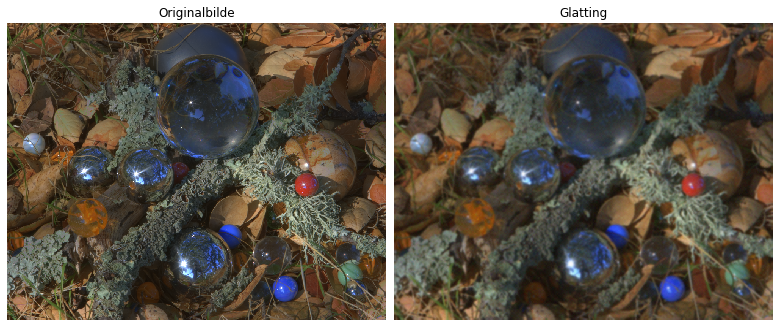

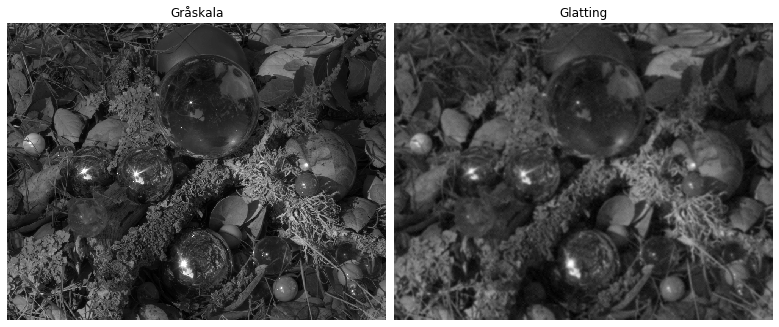

In [26]:
glattingBW(Balls_00032)

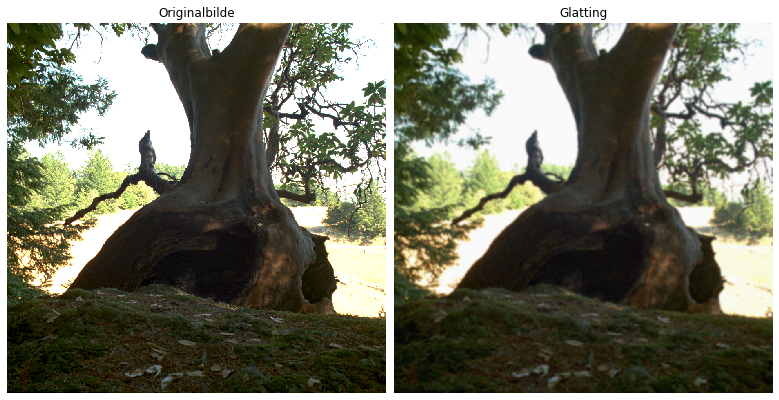

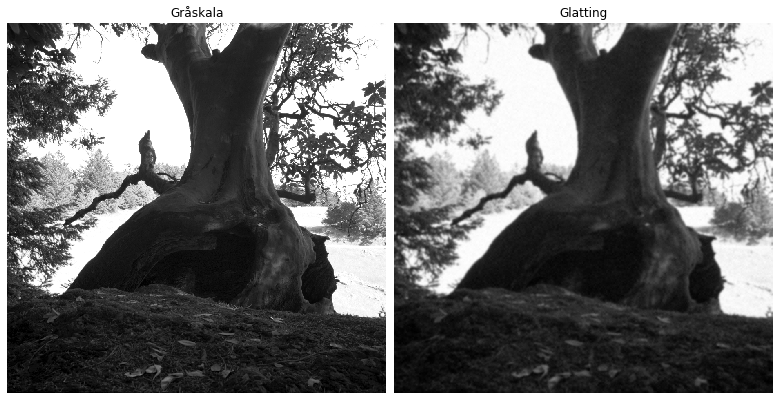

In [27]:
glattingBW(Tree_00032)

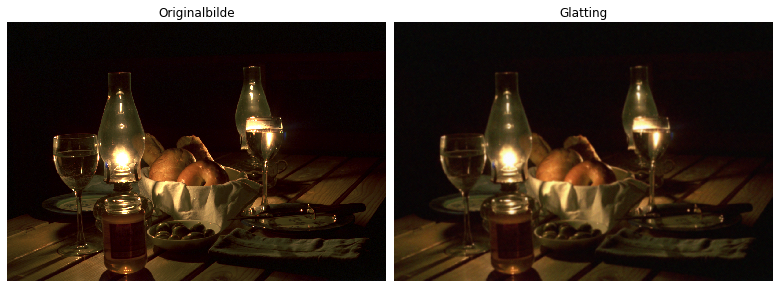

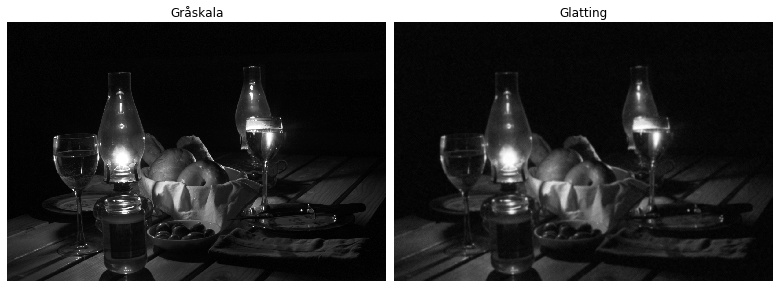

In [28]:
glattingBW(StillLife_01024)